# Template matching using image correlation

In this tutorial we will use correlation as means of finding a template in an image, something like where's waldo.

In [1]:
from imagetitan.image_utils import open_image, correlate_kernel
import cv2 as cv2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['image.cmap'] = 'gray'

Consider the following image with a bunch of different shapes. They have been normalized so all our calculations are in the same numerical plane.

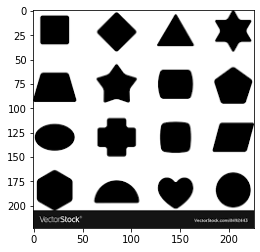

In [2]:
glyph_map = open_image('../images/basic_shapes.png')
plt.imshow(glyph_map)
normalized_glyph = (glyph_map - glyph_map.min())/ (glyph_map.max()- glyph_map.min())

Let's pick a template image that we will look for in the above set of shapes. (the template has been cropped out of the same original set above) 

In [1]:
glyph = normalized_glyph[50:101,60:111]
plt.imshow(glyph)

NameError: name 'normalized_glyph' is not defined

Performing correlation operation on the above image with our template as a kernel gives us the following correlation map. The dark areas are those which have very limited closeness to the template that is being searched for. and the white spots are the places where there's very high degree of correlation. 

k_span is  25
image height is: 223 & image with is: 226


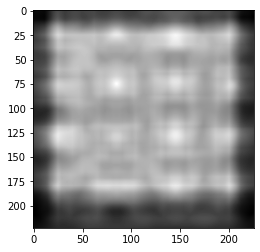

In [4]:
found = correlate_kernel(normalized_glyph, glyph, convolve=False)  
plt.imshow(found)

Since the shape is uniquely present in one place, the point at which the correlation map has the highest values is where our template is present. 

In [5]:
np.where(found==found.max())

(array([75]), array([85]))

For better visualization, look at the 3D plot of the correlation map below where you will see a various peaks but the true location is has the pointiest and highest peak. Furthermore, There's also a very close second which is a 6 legged start which is very close to our template of a 5 legged star. 

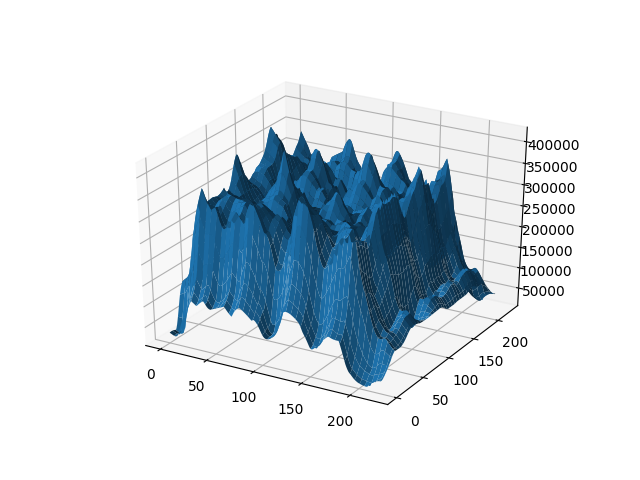

In [6]:
%matplotlib widget

x,y = np.meshgrid(np.arange(found.shape[0]),np.arange(found.shape[1]))
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,found.transpose()*255)
plt.show()
